/workspaces/DL-Excersize/notebooks/DL3_20241006
/workspaces/DL-Excersize/notebooks
==================iteration:0================
std=0.01:2.3025245927302227
Xavier:2.3146589619649394
He:2.4132312832241847
==================iteration:100================
std=0.01:2.3029564816810195
Xavier:2.257925613080021
He:1.5379701587815666
==================iteration:200================
std=0.01:2.3008926234081573
Xavier:2.138880332389259
He:0.8008270664557731
==================iteration:300================
std=0.01:2.301216147888924
Xavier:1.7631847304590413
He:0.504976842415672
==================iteration:400================
std=0.01:2.3015970575143445
Xavier:1.257856069012607
He:0.4267466001817743
==================iteration:500================
std=0.01:2.301647365591301
Xavier:0.8402914876667739
He:0.347512306726353
==================iteration:600================
std=0.01:2.302809792808093
Xavier:0.6681123607324502
He:0.35245687095702044
==================iteration:700================
std=0.01:2

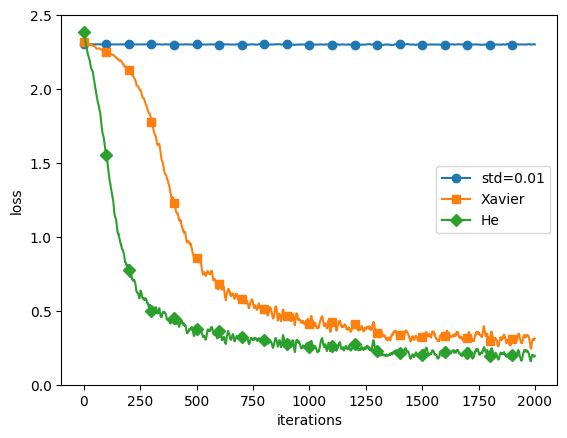

In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# MNIST 데이터 불러오기
(x_train, t_train), (x_test,t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

#실험용 설정
weight_init_types = {'std=0.01':0.01, 'Xavier': 'sigmoid', 'He':'ReLu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100,100,100,100],output_size=10,weight_init_std=weight_type)
    train_loss[key] = [] 

#훈련시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("==================" + 'iteration:' + str(i) + '================')
        for key in weight_init_types.keys():
            loss= networks[key].loss(x_batch, t_batch)
            print(key + ':' + str(loss))

#그래프 그리기
markers = {'std=0.01':'o','Xavier':'s','He':'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x,smooth_curve(train_loss[key]),marker=markers[key],markevery = 100, label=key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0,2.5)
plt.legend()
plt.show()

